# Is it too cold in my apartment?
___

### Data Collection and EDA.



In [1]:
# Importing our stuff.
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
from datetime import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objects as go
import plotly
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings("ignore")

In [2]:
# To see our available data.
apt_temps = pd.read_excel('data/NovDecApartmentTempsTable.xlsx')
to_temps_nov = pd.read_csv('data/east_york_temps/en_climate_hourly_ON_6158355_11-2019_P1H.csv')
to_temps_dec = pd.read_csv('data/east_york_temps/en_climate_hourly_ON_6158355_12-2019_P1H.csv')
apt_energy = pd.read_csv('data/hourlykWh.csv')
daily_apt_energy = pd.read_csv('data/daily_kWh_consumption.csv', sep='\t')
sunout = pd.read_csv('data/SunRiseSunSetToronto.csv')
okta = pd.read_csv('data/weatherstats_toronto_hourly.csv')

We can start by taking a look at our dataframes.

This data was collected using an "Elitech RC-5+ Temperature Data logger Auto-PDF Temperature Recorder USB Design with 32000 Points Reusable" data logger. It was unhandled, kept stationary and suspended by wire 165cm away from the nearest wall and 155cm from the floor (measured from the center of the device). It is placed as near the center of the living space in our Bachelor apartment as to appropriately read room temperature without obstructing daily life activities.

In [3]:
apt_temps.head()

,Serial No.,Time,Temp℃
0,1,2019-11-18 08:52:34,21.3
1,2,2019-11-18 08:54:34,21.6
2,3,2019-11-18 08:56:34,21.1
3,4,2019-11-18 08:58:34,20.6
4,5,2019-11-18 09:00:34,20.3


The following monthly weather data was accessed from the Government of Canada Historical Climate Data service where the following command line query was used to obtain the data.

```
for year in `seq 2019 2019`;do for month in `seq 11 12`;do wget --content-disposition "https://climate.weather.gc.ca/climate_data/bulk_data_e.html?format=csv&stationID=31688&Year=${year}&Month=${month}&Day=14&timeframe=1&submit= Download+Data" ;done;done
```

I would also like to point out here that I had wonderful help from John Richard at the National Climate Services. They were incredibly informative and took the time and care to respond to questions in great detail. 


In [4]:
to_temps_nov.head()

,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time,Year,Month,Day,Time,Temp (°C),Temp Flag,Dew Point Temp (°C),Dew Point Temp Flag,Rel Hum (%),Rel Hum Flag,Wind Dir (10s deg),Wind Dir Flag,Wind Spd (km/h),Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
0,-79.4,43.67,TORONTO CITY,6158355,2019-11-01 00:00,2019,11,1,00:00,7.0,NaN,3.5,NaN,78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.17,NaN,NaN,NaN,NaN,NaN,NaN
1,-79.4,43.67,TORONTO CITY,6158355,2019-11-01 01:00,2019,11,1,01:00,5.5,NaN,0.0,NaN,68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.44,NaN,NaN,NaN,NaN,NaN,NaN
2,-79.4,43.67,TORONTO CITY,6158355,2019-11-01 02:00,2019,11,1,02:00,4.7,NaN,-0.9,NaN,67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.75,NaN,NaN,NaN,NaN,NaN,NaN
3,-79.4,43.67,TORONTO CITY,6158355,2019-11-01 03:00,2019,11,1,03:00,3.9,NaN,-0.2,NaN,75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.00,NaN,NaN,NaN,NaN,NaN,NaN
4,-79.4,43.67,TORONTO CITY,6158355,2019-11-01 04:00,2019,11,1,04:00,3.7,NaN,-0.4,NaN,74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.23,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
to_temps_dec.head()

,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time,Year,Month,Day,Time,Temp (°C),Temp Flag,Dew Point Temp (°C),Dew Point Temp Flag,Rel Hum (%),Rel Hum Flag,Wind Dir (10s deg),Wind Dir Flag,Wind Spd (km/h),Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
0,-79.4,43.67,TORONTO CITY,6158355,2019-12-01 00:00,2019,12,1,00:00,-0.7,NaN,-8.1,NaN,57.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.21,NaN,NaN,NaN,NaN,NaN,NaN
1,-79.4,43.67,TORONTO CITY,6158355,2019-12-01 01:00,2019,12,1,01:00,-1.9,NaN,-6.0,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.11,NaN,NaN,NaN,NaN,NaN,NaN
2,-79.4,43.67,TORONTO CITY,6158355,2019-12-01 02:00,2019,12,1,02:00,-2.0,NaN,-5.3,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.96,NaN,NaN,NaN,NaN,NaN,NaN
3,-79.4,43.67,TORONTO CITY,6158355,2019-12-01 03:00,2019,12,1,03:00,-2.5,NaN,-5.3,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.88,NaN,NaN,NaN,NaN,NaN,NaN
4,-79.4,43.67,TORONTO CITY,6158355,2019-12-01 04:00,2019,12,1,04:00,-3.0,NaN,-5.2,NaN,85.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.74,NaN,NaN,NaN,NaN,NaN,NaN


The apartment kWh usage data was retrieved by accessing the Electric Company (not the real name, it is a utility measurement company who provides billing services for our buildings). The Electric Company offers access to many excellent historical records of personal electricity use. They offer daily consumption totals as a downloadable `.xlsx` file. You are also able to look at specific days and see your hourly consumption, but you are unable to download that data to a file.

I attempted to find a way to scrape this hourly data, however the graphs on the site are interactive and scraping the data was beyond my current skill. Instead I went through 800+ entries and copy pasted the data to an excel sheet. Later on we will evaluate my accuracy.

In [6]:
# Data copy/pasted
apt_energy.head()

,Date,kWh
0,12/23/2019 5:00,0.084
1,12/23/2019 4:00,0.074
2,12/23/2019 3:00,0.070
3,12/23/2019 2:00,0.076
4,12/23/2019 1:00,0.080


In [7]:
# Data downloaded directly from Electric Company
daily_apt_energy.head()

,Read Date,Usage Amount
0,11/18/2019,5.33
1,11/19/2019,8.41
2,11/20/2019,8.82
3,11/21/2019,10.25
4,11/22/2019,10.38


The `sunout` dataframe was created taking data from  the [National Research Council](https://www.nrc-cnrc.gc.ca/eng/services/sunrise/advanced.html) and saving it as `.csv`. This will be used to create a boolean variable for use in regressions later on.

In [8]:
sunout.head()

,Date,Nautical,Civil,Rise,Noon,Set,Civil,Nautical.1,Day,Sky,Total,hh:mm:ss,
0,Jan 1,6:43,7:19,7:51,12:21,16:51,17:24,18:00,8.99,1.09,10.08,6:24:47,
1,Jan 2,6:43,7:19,7:51,12:22,16:52,17:24,18:01,9.00,1.09,10.09,6:28:43,
2,Jan 3,6:43,7:19,7:51,12:22,16:53,17:25,18:01,9.02,1.09,10.11,6:32:40,
3,Jan 4,6:43,7:19,7:51,12:22,16:54,17:26,18:02,9.04,1.09,10.12,6:36:37,
4,Jan 5,6:43,7:19,7:51,12:23,16:55,17:27,18:03,9.05,1.08,10.14,6:40:33,


The `okta` dataframe data was obtained from weatherstats.ca, specifically [here](https://toronto.weatherstats.ca/download.html). Weatherstats.ca collects and aggregates the data from multiple Environment and Climate Change Canada sources. The only data we will be using from here will be the 'cloud_cover_8' column, which describes the cloud covers in 'oktas'. An [okta](https://en.wikipedia.org/wiki/Okta) is a measurement of cloud cover, with 8 being completely cloudy, and 0 being clear. This data may be helpful in later regressions.

In [9]:
okta.head()

,date_time_local,unixtime,pressure_station,pressure_sea,wind_dir,wind_dir_10s,wind_speed,wind_gust,relative_humidity,dew_point,temperature,windchill,humidex,visibility,health_index,cloud_cover_4,cloud_cover_8,cloud_cover_10,solar_radiation
0,2020-01-20 14:00:00 EST,1579546800,101.00,103.2,WNW,30,14,NaN,43,-16.7,-5.9,-11.0,NaN,24100,NaN,NaN,1.0,NaN,NaN
1,2020-01-20 13:00:00 EST,1579543200,101.05,103.3,SE,13,8,NaN,63,-13.9,-7.9,-12.0,NaN,24100,2.9,NaN,0.0,NaN,NaN
2,2020-01-20 12:00:00 EST,1579539600,101.11,103.3,N,0,2,NaN,63,-15.3,-9.4,-11.0,NaN,24100,3.0,NaN,0.0,NaN,NaN
3,2020-01-20 11:00:00 EST,1579536000,101.14,103.4,NE,4,11,NaN,67,-15.7,-10.7,-16.0,NaN,24100,3.2,NaN,1.0,NaN,NaN
4,2020-01-20 10:00:00 EST,1579532400,101.10,103.3,NW,33,15,NaN,71,-17.0,-12.8,-20.0,NaN,24100,3.4,NaN,1.0,NaN,NaN


We would like to combine all of these dataframes into one to work with it more easily. To do that we'll perform some simple changes.

For `apt_temps`:
    
   - We will change the column title 'Time' to 'Date/Time' and 'Temp' to 'Apt_Temp'
   - We will group the entries by Date/Time to the closest hour, averaging the temp in that hour.

`apt_energy` and `daily_apt_energy`:
    
   - We will change the column title 'Date' to 'Date/Time'
   - We will change the content of 'Date/Time' to be consistent with the other dataframes
   - The data present in `apt_energy` was documented by hand (read in from the site and recorded personally). We will be confirming that the data is consistent with the daily readouts provided by the electricity measurement company with the exception of the first and last days recorded in `apt_energy` as these records do not include the full day.

`to_temps_nov` & `to_temps_dec`:
    
   - We will append these two dataframes.
   
`okta`:
   - Reduce the dataframe to 'date_time_local' and 'cloud_cover_8'.
   - Convert column names to 'Date/Time' and 'Cloud_Cover_In_Oktas'

`sunout`:
   - Reduce the columns only to date, rise, and set
   - create a binary column in our final dataset that depicts whether the sun was out during this record or not.

Finally we will be able to join the dataframes on their 'Date/Time' entries. All except `sunout`, where instead we will use its data to inform a new column in our main dataframe

In [10]:
# apt_temps modifications

# Renaming columns
apt_temps.rename(columns={'Time':'Date/Time', 'Temp℃':'Apt_Temp'}, inplace=True)

# Change column to desired datatype and set as index
apt_temps['Date/Time'] = pd.to_datetime(apt_temps['Date/Time'])
apt_temps.set_index('Date/Time', inplace=True)

# Drop the unenecessary column
apt_temps.drop(['Serial No.'], axis=1, inplace=True)

# Aggregate our data into hourly recordings.
apt_temps = apt_temps.resample('H').mean()

In [11]:
# apt_energy modifications

# Renaming columns
apt_energy.rename(columns={'Date':'Date/Time'}, inplace=True)
daily_apt_energy.rename(columns={'Read Date':'Date/Time', 'Usage Amount': 'kWh_Total'}, inplace=True)

# Change column to desired datatype and set as index
apt_energy['Date/Time'] = pd.to_datetime(apt_energy['Date/Time'])
apt_energy.set_index('Date/Time', inplace=True)
daily_apt_energy['Date/Time'] = pd.to_datetime(daily_apt_energy['Date/Time'])
daily_apt_energy.set_index('Date/Time', inplace=True)

Now to check the accuracy of our `apt_energy` dataframe.

In [12]:
# apt_energy and daily_apt_energy data recording check.

# Create a dataframe to compare my recordings of the hourly consumption data given by Electric Company and the daily consumption data
# given by Electric Company
check_apt_energy = apt_energy.resample('24h', base=6).sum()
check_apt_energy.index = check_apt_energy.index.date
check_all = check_apt_energy.join(daily_apt_energy, how='left')

# To see how many are the same
check_all['Check'] = check_all['kWh'] == check_all['kWh_Total']
check_all['Check'].value_counts()

False    35
Name: Check, dtype: int64

Here we see that NONE my recorded values sum to the given daily totals from the Electric Company. I may have made errors on each day, but I have a hunch (arrogantly) that they don't line up on the site either. I copy pasted the hourly data offered by Electric Company for November 19 (arbitrarily chosen) to double check. Then we can compare to the daily consumption record they provide and see if they line up. 

In [13]:
nov_19_check = [0.162,0.116,0.084,0.074,0.092,0.068,0.068,0.074,0.168,0.21,0.15,0.148,0.37,0.12,0.16,0.222,0.648,0.87,1.114,0.786,0.812,0.894,0.738,0.524]

total_nov_19_check = sum(nov_19_check)

print('Difference between daily consumption data download and recent recording: \n')
print(daily_apt_energy[daily_apt_energy.index == '2019-11-19'], total_nov_19_check, '\n')
print('Difference between initial recording and recent recording: \n')
print(check_all['kWh'][check_all['kWh'].index == '2019-11-19'], total_nov_19_check)

Difference between daily consumption data download and recent recording: 

            kWh_Total
Date/Time            
2019-11-19       8.41 8.672 

Difference between initial recording and recent recording: 

2019-11-19    8.822
Name: kWh, dtype: float64 8.672


As shown above, there is a difference of 0.262 in the daily consumption data downloaded and our recent recording. This might be a difference in start hour or end hour recorded or how they report usage in the daily consumption data. There also a difference between our most recent recording and the initial recording resampled for the day. The Electric Company doesn't state how the daily consumption records are evaluated, but the hourly records are from 0600-0500. 

We need to look at the statistics of the daily consumption as well as the those of our intitial recording. If the means, mins, maxes, and standard deviation are similar then the data should be correct but only reported differently.

In [14]:
check_all['Diff_Sum'] = check_all['kWh'] - check_all['kWh_Total']
print('These are calculations on the difference between the initial recordings and the daily consumption data: \n',check_all['Diff_Sum'].describe(), '\n')
print('These are the calculations on the initial recordings: \n',check_all['kWh'].describe(), '\n')
print('these are the calculations on the daily consumption data: \n',check_all['kWh_Total'].describe(), '\n')

These are calculations on the difference between the initial recordings and the daily consumption data: 
 count    34.000000
mean     -0.152488
std       4.525324
min     -10.624000
25%      -3.856500
50%       1.065000
75%       3.058000
max       7.826000
Name: Diff_Sum, dtype: float64 

These are the calculations on the initial recordings: 
 count    35.000000
mean      9.257469
std       4.106706
min       2.376000
25%       5.709000
50%       9.084400
75%      12.050000
max      19.246000
Name: kWh, dtype: float64 

these are the calculations on the daily consumption data: 
 count    34.000000
mean      9.582941
std       4.169632
min       2.380000
25%       5.885000
50%       9.455000
75%      12.205000
max      19.250000
Name: kWh_Total, dtype: float64 



The absolute mean difference is 0.152488 between the hourly report and the daily consumption report. We can see that the max, min, std, and mean for the initial recordings  and daily consumption data are incredibly similar. The explanation for the differences is likely that this is just a difference in a single hourly recording. The kWh recordings are not perfectly accurate. We will continue to use this data as a 'best available' resource however any insights or conclusions made will have to be with the caveat that our assumption is the data is accurate enough for our purposes.

In [15]:
# to_temps_nov & to_temps_dec modifications

# To combine the dataframes
df_temps = to_temps_nov.append(to_temps_dec)

# Change column to desired datatype and set as index
df_temps['Date/Time'] = pd.to_datetime(df_temps['Date/Time'])
df_temps.set_index('Date/Time', inplace=True)

In [16]:
# okta modifications

# To reduce columns
okta = okta[['date_time_local', 'cloud_cover_8']]

# Rename the columns for consistency
okta.rename(columns={'date_time_local':'Date/Time', 'cloud_cover_8':'Cloud_Cover_In_Oktas'}, inplace=True)

# Change column to desired datatype and set as index
okta['Date/Time'] = pd.to_datetime(okta['Date/Time'])
okta.set_index('Date/Time', inplace=True)

# To remove timezone awareness
okta.index = okta.index.tz_convert(None)

In [17]:
# sunout modifications
sunout = sunout.rename(columns={'Date':'Date/Time', '   Rise':'Rise', '   Set':'Set'})
sunout = sunout[['Date/Time', 'Rise', 'Set']]

# Change the date column to a datetime object
sunout['Date/Time'] = sunout['Date/Time'].apply(lambda x: dt.strptime(x, '%b %d'))
sunout['Date/Time'] = sunout['Date/Time'].apply(lambda x: x.replace(year=2019))

## Make the index of `sunout` the 'Date/Time' column
sunout.set_index('Date/Time', inplace=True)

# Change other columns to appropriate datetime objects
## removing the white space in the string
sunout['Rise'] = sunout['Rise'].apply(lambda x: x.lstrip())
sunout['Set'] = sunout['Set'].apply(lambda x: x.lstrip())

## Change to datetime
sunout['Rise'] = sunout['Rise'].apply(lambda x: dt.strptime(x, '%H:%M'))
sunout['Set'] = sunout['Set'].apply(lambda x: dt.strptime(x, '%H:%M'))


# THERE IS LIKELY A BETTER CODE THAN THIS. But it worked so cool.
for i in range(0, len(sunout)):
    sunout['Rise'][i] = sunout['Rise'][i].replace(year=sunout['Rise'].index[i].year, month=sunout['Rise'].index[i].month, day=sunout['Rise'].index[i].day)
    sunout['Set'][i] = sunout['Set'][i].replace(year=sunout['Set'].index[i].year, month=sunout['Set'].index[i].month, day=sunout['Set'].index[i].day)

In [18]:
# Now to combine our dataframes

df_temps = df_temps.join(apt_temps, how='left')
df_temps = df_temps.join(apt_energy, how='left')
df_temps = df_temps.join(okta, how='left')

# Before joining `sunout` we need to add a column as a key into `df_temps`
df_temps['Sunout_Key'] = [f'{i.year} {i.month} {i.day}' for i in df_temps.index]

# Change it to datetime
df_temps['Sunout_Key'] = pd.to_datetime(df_temps['Sunout_Key'])

# Finally join
df_temps = df_temps.join(sunout, how='left', on='Sunout_Key')

The 'Sun_Up' column will check to see if the record was recorded while the sun was up!

In [19]:
# To make the binary 'Sun_Up' column
df_temps['Sun_Up'] = (df_temps.index >= df_temps['Rise']) & (df_temps.index <= df_temps['Set'])
df_temps['Sun_Up'] = df_temps['Sun_Up'].apply(lambda x: int(x))

The main reason for this project is to show that it's not often warm enough in my apartment according to [Chapter 629 - 38 Heating and air conditioning](http://www.toronto.ca/legdocs/municode/1184_629.pdf). This bylaw is briefly explained [here](https://www.toronto.ca/311/knowledgebase/kb/docs/articles/municipal-licensing-and-standards/investigation-services/bylaw-enforcement-low-heat-no-heat-air-conditioning-air-conditioner-units-residential-properties.html)

For this reason we should add one more column 'Warm_Enough' to help us quantify and visualize how often, and when, it was recorded to be the minimum 21 degrees Celsius in my apartment.

In [20]:
df_temps['Warm_enough'] = df_temps['Apt_Temp'] >= 21
df_temps['Warm_enough'] = df_temps['Warm_enough'].apply(lambda x: int(x))

In [21]:
# To check
df_temps.head()

,Longitude (x),Latitude (y),Station Name,Climate ID,Year,Month,Day,Time,Temp (°C),Temp Flag,Dew Point Temp (°C),Dew Point Temp Flag,Rel Hum (%),Rel Hum Flag,Wind Dir (10s deg),Wind Dir Flag,Wind Spd (km/h),Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather,Apt_Temp,kWh,Cloud_Cover_In_Oktas,Sunout_Key,Rise,Set,Sun_Up,Warm_enough
Date/Time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-11-01 00:00:00,-79.4,43.67,TORONTO CITY,6158355,2019,11,1,00:00,7.0,NaN,3.5,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,2019-11-01,2019-11-01 06:53:00,2019-11-01 17:09:00,0,0
2019-11-01 01:00:00,-79.4,43.67,TORONTO CITY,6158355,2019,11,1,01:00,5.5,NaN,0.0,NaN,68.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2019-11-01,2019-11-01 06:53:00,2019-11-01 17:09:00,0,0
2019-11-01 02:00:00,-79.4,43.67,TORONTO CITY,6158355,2019,11,1,02:00,4.7,NaN,-0.9,NaN,67.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,2019-11-01,2019-11-01 06:53:00,2019-11-01 17:09:00,0,0
2019-11-01 03:00:00,-79.4,43.67,TORONTO CITY,6158355,2019,11,1,03:00,3.9,NaN,-0.2,NaN,75.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2019-11-01,2019-11-01 06:53:00,2019-11-01 17:09:00,0,0
2019-11-01 04:00:00,-79.4,43.67,TORONTO CITY,6158355,2019,11,1,04:00,3.7,NaN,-0.4,NaN,74.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,2019-11-01,2019-11-01 06:53:00,2019-11-01 17:09:00,0,0


Time to clean!

We should keep only the columns we are interested in. What are we interested in?

The columns we are interested in are those that we have created, as well as the columns that contain data which we hope will help describe and predict the apartment temperature. First, let's see which columns contain any data at all.

In [22]:
print(f'{df_temps.isna().sum()}\n\n', f'Dataframe shape: {df_temps.shape}')

Longitude (x)              0
Latitude (y)               0
Station Name               0
Climate ID                 0
Year                       0
Month                      0
Day                        0
Time                       0
Temp (°C)                192
Temp Flag               1464
Dew Point Temp (°C)      192
Dew Point Temp Flag     1464
Rel Hum (%)              192
Rel Hum Flag            1464
Wind Dir (10s deg)      1464
Wind Dir Flag           1464
Wind Spd (km/h)         1464
Wind Spd Flag           1464
Visibility (km)         1464
Visibility Flag         1464
Stn Press (kPa)          192
Stn Press Flag          1464
Hmdx                    1464
Hmdx Flag               1464
Wind Chill              1464
Wind Chill Flag         1464
Weather                 1464
Apt_Temp                 647
kWh                      624
Cloud_Cover_In_Oktas      35
Sunout_Key                 0
Rise                       0
Set                        0
Sun_Up                     0
Warm_enough   

Looking at the shape we can see that many columns contain only null values. Besides this there are some columns such as 'Longitude (x)' and 'Station Name' that we won't need. For this reason we will just recreate our dataframe with the desired columns in an order we would like. It is the hope that the explanation for the column choices are self-evident. 

In [23]:
df_temps = df_temps[['Temp (°C)', 'Dew Point Temp (°C)', 'Rel Hum (%)',\
                     'Stn Press (kPa)', 'kWh', 'Cloud_Cover_In_Oktas', 'Sun_Up', 'Warm_enough', 'Apt_Temp']]

The next step is to reduce the dataframe to only those records without any null values.

In [24]:
df_temps.dropna(axis=0, inplace=True)

In [25]:
# Take a quick peek
df_temps.describe()

,Temp (°C),Dew Point Temp (°C),Rel Hum (%),Stn Press (kPa),kWh,Cloud_Cover_In_Oktas,Sun_Up,Warm_enough,Apt_Temp
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000
mean,0.826092,-4.005368,70.767790,100.129888,0.390304,5.891386,0.372035,0.449438,20.883854
std,4.495115,5.211754,11.067114,1.067349,0.356025,2.662600,0.483650,0.497748,0.936555
min,-14.900000,-21.400000,42.000000,98.060000,0.064000,0.000000,0.000000,0.000000,18.466667
25%,-1.900000,-7.100000,63.000000,99.310000,0.090000,4.000000,0.000000,0.000000,20.250000
50%,0.900000,-3.900000,70.000000,100.040000,0.192000,7.000000,0.000000,0.000000,20.906667
75%,3.800000,0.100000,79.000000,100.890000,0.730000,8.000000,1.000000,1.000000,21.466667
max,11.300000,8.000000,94.000000,102.490000,1.930000,8.000000,1.000000,1.000000,23.216667


Let's analyze the data to show the possible temperature problems with my apartment and how it relates to the external weather as well as personal electricity usage.

Above we can already see that the mean (average) of 'Warm_Enough' is 0.45. This means that for the recorded temperature, it was below the minimum of 21 degrees celsius for over half the time. We can visualize this as a plot over time and highlight the legal minimum floor.

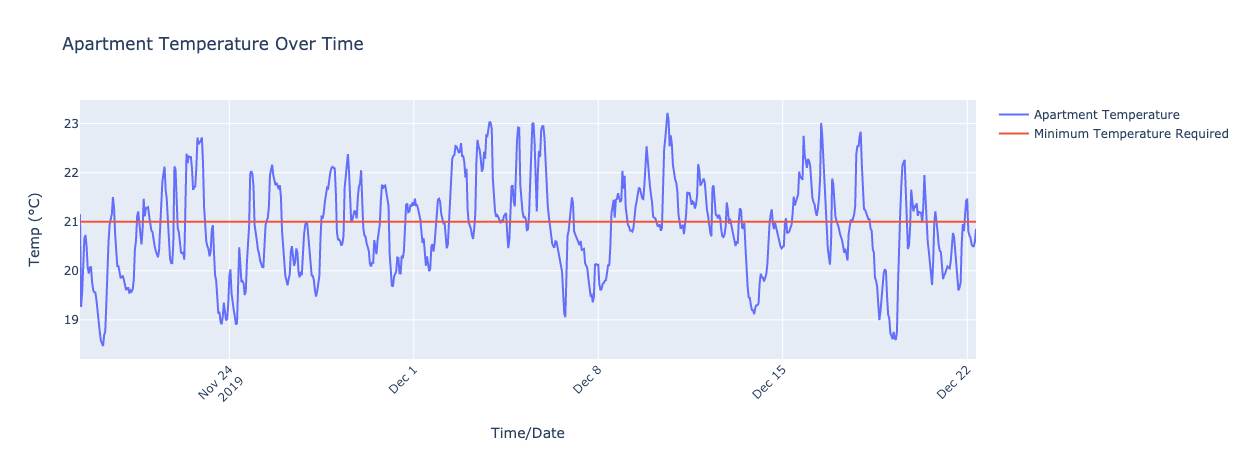

In [31]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df_temps.index, y=df_temps['Apt_Temp'],
                    mode='lines',
                    name='Apartment Temperature'))
fig.add_trace(go.Scatter(x=df_temps.index, y=[21 for i in df_temps.index],
                    mode='lines',
                    name='Minimum Temperature Required'))
fig.update_layout(title_text='Apartment Temperature Over Time',
                  xaxis_tickangle=-45,
                  xaxis_title="Time/Date",
                  yaxis_title="Temp (°C)")
plotly.offline.plot(fig, filename='Apartment Temperature Over Time.html')
fig.show()

Above we can visually see how the average hourly temperature in the apartment fluctuated over time.

When we feel cold we use an electric space heater. I hope to see how the electricity we use effects the temperature in our apartment, if at all. To find out if any of the variables we have found are statistically significant in predicting the temperature in our apartment we would need to perform a statistical test such as multiple linear regression. For now, we are just going to create some visualizations to maybe derive some insights.

We can do this by comparing the average hourly 'kWh', 'Temp (°C)', and 'Apt_Temp'. To really show a comparison we need to first put the three on the same scale, in this case it will be from 0-1. This won't be useful in determining exact effects or changes. Instead the goal will be to determine the ordinal differences between each variable. Questions we can answer would be, "For this time period, on average, what time of day is it coldest in the apartment or outside? What time of day saw the most electricity usage?". With this data we **CANNOT** answer "Did electicity usage change the temperature in the apartment?"

In [27]:
# To scale our data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Take a copy of the series and turn it into a dataframe, the scaler wants it in this format
kwh_y = pd.DataFrame(df_temps['kWh'].groupby(df_temps.index.hour).mean().copy())
apt_temps_y = pd.DataFrame(df_temps['Apt_Temp'].groupby(df_temps.index.hour).mean().copy())
temp_y = pd.DataFrame(df_temps['Temp (°C)'].groupby(df_temps.index.hour).mean().copy())

# Scale the data
kwh_y_scaled = scaler.fit_transform(kwh_y)
apt_temps_y_scaled = scaler.fit_transform(apt_temps_y)
temp_y_scaled = scaler.fit_transform(temp_y)

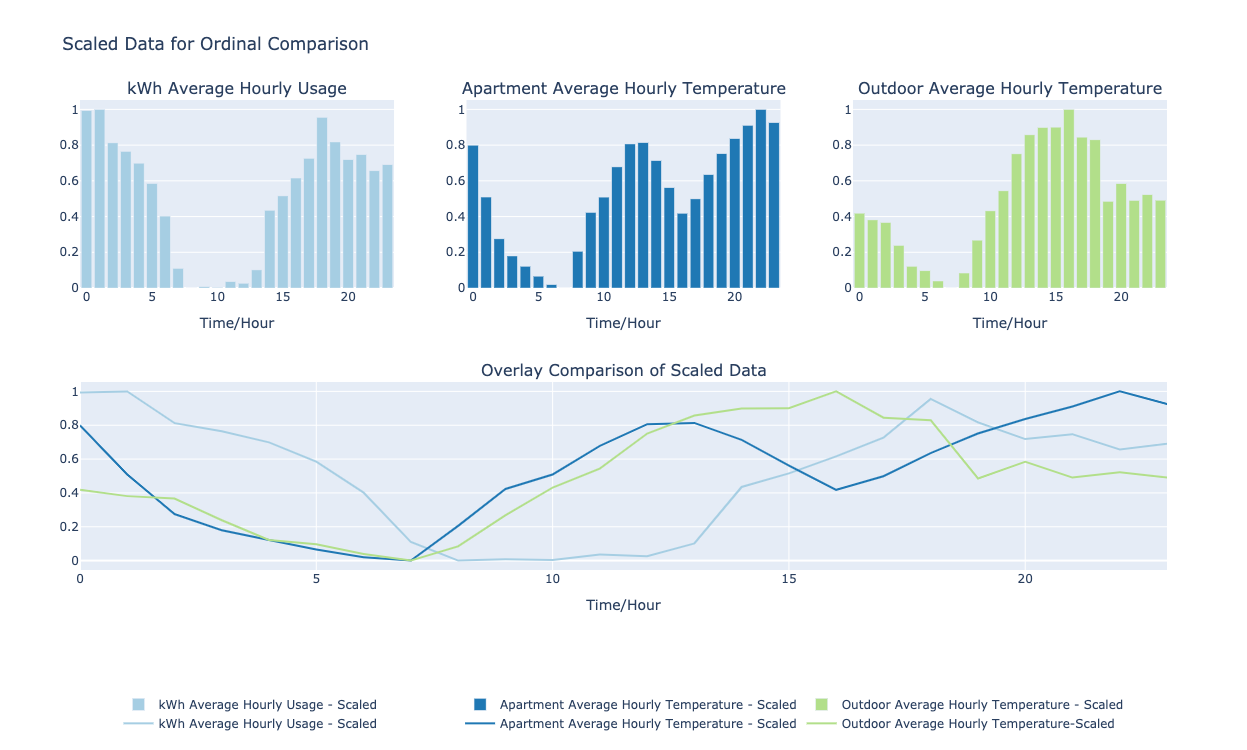

In [34]:
# Plotting the scaled data

fig = make_subplots(
    rows=2, cols=3,
    column_widths=[0.3, 0.3, 0.3],
    row_heights=[0.5, 0.5],
    vertical_spacing=0.2,
    specs=[[{}, {}, {}],
           [{"colspan": 3}, None, None]],
    subplot_titles=("kWh Average Hourly Usage", "Apartment Average Hourly Temperature",\
                    "Outdoor Average Hourly Temperature", "Overlay Comparison of Scaled Data"))

fig.add_trace(go.Bar(x=np.arange(0, 24), 
                     y=kwh_y_scaled[:, 0], 
                     marker_color='rgba(166,206,227,1)',
                     name='kWh Average Hourly Usage - Scaled'),
                     row=1, col=1)

fig.add_trace(go.Bar(x=np.arange(0, 24), 
                     y=apt_temps_y_scaled[:,0], 
                     marker_color='rgba(31,120,180,1)',
                     name='Apartment Average Hourly Temperature - Scaled'),
                     row=1, col=2)


fig.add_trace(go.Bar(x=np.arange(0, 24), 
                     y=temp_y_scaled[:,0], 
                     marker_color='rgba(178,223,138,1)',
                     name='Outdoor Average Hourly Temperature - Scaled'),
                     row=1, col=3)


fig.add_trace(go.Scatter(x=np.arange(0, 24), 
                         y=kwh_y_scaled[:, 0], 
                         marker_color='rgba(166,206,227,1)',
                         name='kWh Average Hourly Usage - Scaled'), 
                         row=2, col = 1)

fig.add_trace(go.Scatter(x=np.arange(0, 24), 
                         y=apt_temps_y_scaled[:,0], 
                         marker_color='rgba(31,120,180,1)',
                         name='Apartment Average Hourly Temperature - Scaled'), 
                         row=2, col = 1)

fig.add_trace(go.Scatter(x=np.arange(0, 24), 
                         y=temp_y_scaled[:,0], 
                         marker_color='rgba(178,223,138,1)',
                         name='Outdoor Average Hourly Temperature-Scaled'), 
                         row=2, col = 1)



fig.update_xaxes(title_text="Time/Hour", row=1, col=1)
fig.update_xaxes(title_text="Time/Hour", row=1, col=2)
fig.update_xaxes(title_text="Time/Hour", row=1, col=3)
fig.update_xaxes(title_text="Time/Hour", row=2, col=1)

fig.update_layout(height=750, 
                  legend_orientation="h", 
                  title='Scaled Data for Ordinal Comparison', 
                  legend=dict(x=0.5, y=-0.255, xanchor='center'))

plotly.offline.plot(fig, filename='Scaled Data for Ordinal Comparison.html')
fig.show()

These are interesting results! Let's see if we can explain them using intuition. Keep in mind that these are averages for the given time period, outliers and extreme values are included here. 

For electricity usage we see that on average we use the most electricity in a day at 6pm and 12-1am. The least electricity is used during the day. This makes sense, as we usually eat dinner around 6pm indicating the spike from a stove or oven, as well as we turn on lights when it's dark. Below we can see the earliest that the sun rose during this time period was between 7:17am - 7:49am and the latest it set was between 4:49pm - 4:44pm. 

In [29]:
print('Ealiest sunrise in our dataset: ', sunout['Rise'][sunout.index >= df_temps.index.min()].min())
print('Latest sunrise in our dataset:  ', sunout['Rise'][sunout.index <= df_temps.index.max()].max())
print('Latest sunset in our dataset:   ', sunout['Set'][sunout.index >= df_temps.index.min()].min())
print('Earliest sunset in our dataset: ', sunout['Set'][sunout.index <= df_temps.index.max()].max())

Ealiest sunrise in our dataset:  2019-11-19 07:17:00
Latest sunrise in our dataset:   2019-12-22 07:49:00
Latest sunset in our dataset:    2019-11-19 16:49:00
Earliest sunset in our dataset:  2019-12-22 16:44:00


This information also helps us to see why we might have the average spike in apartment temperature during the day. There are two large east-facing windows in our bachelor apartment where the sunlight helps to warm the room. This data is corroborated by the similar temperature average hourly temperature changes we see in the outdoor temperature. The temperature seems to peak in the late afternoon and then recede again until the morning, after 7am (sunrise).

The line graph helps visualize that the apartment temperature follows similar trends to the outside temperature with the exception of late afternoons. 

## Conclusion

The very first graph and data point 'Warm_enough' gave us the answer to the question we originally asked. It is too cold in my apartment in respect to the bylaw. The next visualizations helps corroborate our intuition that external variables may be good predictors of the apartment temperature fluctuations.  

___